## Homework 2

* Import Boston Dataset from sklearn dataset class.
* Explore and analyse raw data.
* Do preprocessing for regression.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
* Evaluate the results of all models and choose the best performing model.

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
column_names = load_boston().feature_names
data = pd.DataFrame(X, columns=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
data.isna().sum().sum()

0

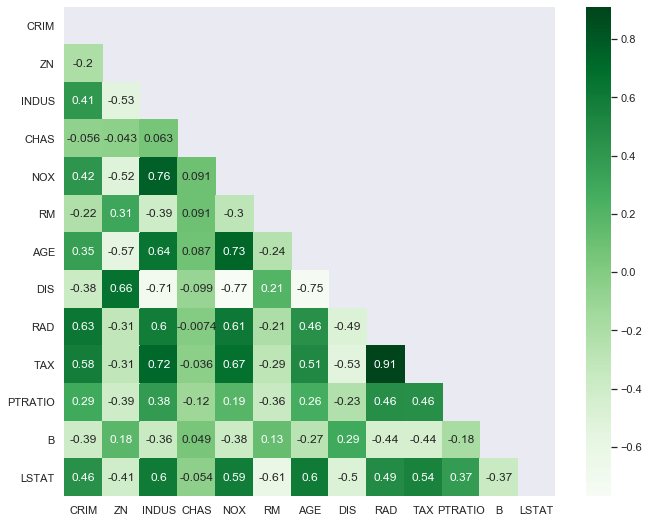

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

### Preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [11]:
X_scaled = MinMaxScaler().fit_transform(X)
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [12]:
z = np.abs(stats.zscore(data))
outliers = list(set(np.where(z > 3)[0]))

X_cleaned = data.drop(outliers)
y_cleaned = y[list(X_cleaned.index)]
X_cleaned.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Modeling

In [13]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### Pipeline

In [14]:
params = {'alpha': np.logspace(-3, 2, 5)}

def model(est, X, y):
    return GridSearchCV(
        est, param_grid=params, cv=5, n_jobs=-1
    ).fit(X, y)

#### Ridge

In [15]:
# All data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ridge_model = model(Ridge(), X_train, y_train)

# Scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
ridge_model_scaled = model(Ridge(), X_train, y_train)

# Without outliers data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=0)
ridge_model_cleaned = model(Ridge(), X_train, y_train)

#### Lasso

In [16]:
# All data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lasso_model = model(Lasso(), X_train, y_train)

# Scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
lasso_model_scaled = model(Lasso(), X_train, y_train)

# Without outliers data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=0)
lasso_model_cleaned = model(Lasso(), X_train, y_train)

### Evaluation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pd.DataFrame({
    'Train R2': [
        ridge_model.score(X_train, y_train),
        lasso_model.score(X_train, y_train)
    ],
    'Test R2': [
        ridge_model.score(X_test, y_test),
        lasso_model.score(X_test, y_test)
    ],
    'Scaled Train R2': [
        ridge_model_scaled.score(MinMaxScaler().fit_transform(X_train), y_train),
        lasso_model_scaled.score(MinMaxScaler().fit_transform(X_train), y_train)
    ],
    'Scaled Test R2': [
        ridge_model_scaled.score(MinMaxScaler().fit_transform(X_test), y_test),
        lasso_model_scaled.score(MinMaxScaler().fit_transform(X_test), y_test)
    ],
    'Cleaned Train R2': [
        ridge_model_cleaned.score(X_train, y_train),
        lasso_model_cleaned.score(X_train, y_train)
    ],
    'Cleaned Test R2': [
        ridge_model_cleaned.score(X_test, y_test),
        lasso_model_cleaned.score(X_test, y_test)
    ]
}, index=['Ridge', 'Lasso'])

,Train R2,Test R2,Scaled Train R2,Scaled Test R2,Cleaned Train R2,Cleaned Test R2
Ridge,0.764543,0.673235,0.763840,0.631968,0.744486,0.642651
Lasso,0.764541,0.673195,0.764339,0.627790,0.738974,0.645281


All modals have slightly the same performance. However the **Ridge** model without pre-processing appears to have the best performance. So I'll choose **Ridge without preprocessing**. Note that this model is underfitted.